In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

# Window Functions: Rolling & Expanding Metrics

## Rolling window function with pandas

Types of windows:
* Rolling Windows 
* Expanding Windows.



In [3]:
pd.read_csv('../stock_data/google.csv').head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


In [4]:
# Calculating a rolling average

data =pd.read_csv('../stock_data/google.csv', parse_dates=['Date'], index_col='Date')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


<Axes: xlabel='Date'>

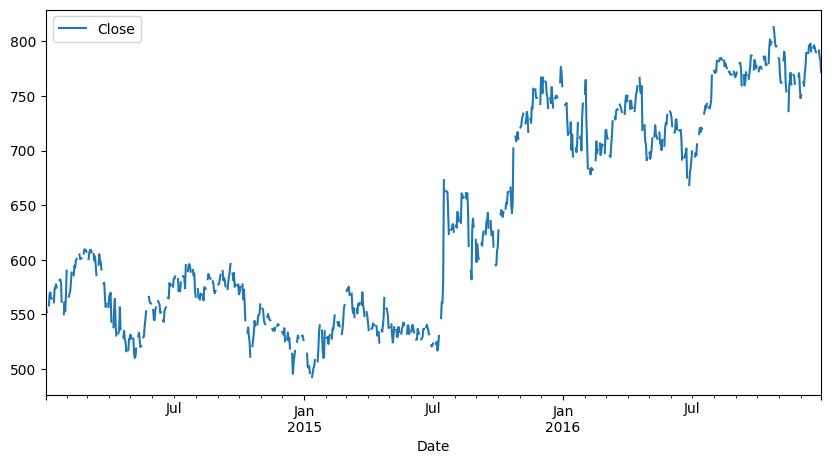

In [5]:
data.plot()

**Calculating a rolling average**

we apply rolling with an integer window size of 30. This means that the window will contain the previous 30 observations, or trading days. When you choose an integer-based window size, pandas will only calculate the mean if the window has no missing values. You can change this default by setting the min_periods parameter to a value smaller than the window size of 30.

In [6]:

data.rolling(window=30).mean()# fixed # observations

,Close
Date,
2014-01-02,NaN
2014-01-03,NaN
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,NaN
...,...
2016-12-26,NaN
2016-12-27,NaN
2016-12-28,NaN


you can also create windows based on a date offset. If you choose 30D, for instance, the window will contain the days when stocks were traded during the last 30 calendar days. While the window is fixed in terms of period length, the number of observations will vary. Let's take a look at what the rolling mean looks like.

In [7]:
# 30D: Number of Calendar days

data.rolling(window='30D').mean()# fixed period length

,Close
Date,
2014-01-02,556.000000
2014-01-03,553.975000
2014-01-04,553.975000
2014-01-05,553.975000
2014-01-06,555.350000
...,...
2016-12-26,779.575500
2016-12-27,780.145714
2016-12-28,780.946190


**90 day rolling mean**

Calculate a 90 calendar day rolling mean, and join it to the stock price. The join method allows you to concatenate a Series or DataFrame along axis 1, that is, horizontally. It's just a different way of using the pddot-concat function you've seen before. You can see how the new time series is much smoother because every data point is now the average of the preceding 90 calendar days. To see how extending the time horizon affects the moving average,

<Axes: xlabel='Date'>

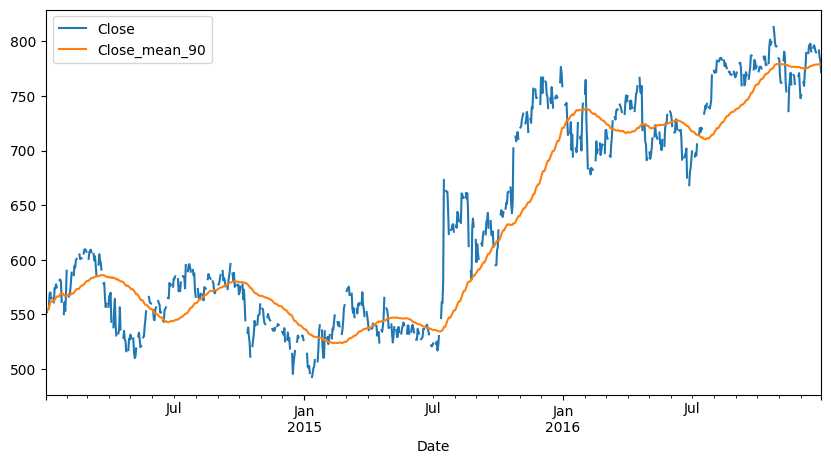

In [8]:
## 90 day rolling mean
r90 = data.rolling(window='90D').mean()
data.join(r90.add_suffix('_mean_90')).plot()

**90 & 360 day rolling means**

let's add the 360 calendar day moving average. The series now appears smoother still, and you can more clearly see when short term trends deviate from longer term trends, for instance when the 90 day average dips below the 360 day average in 2015. Similar to groupby,


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


<Axes: xlabel='Date'>

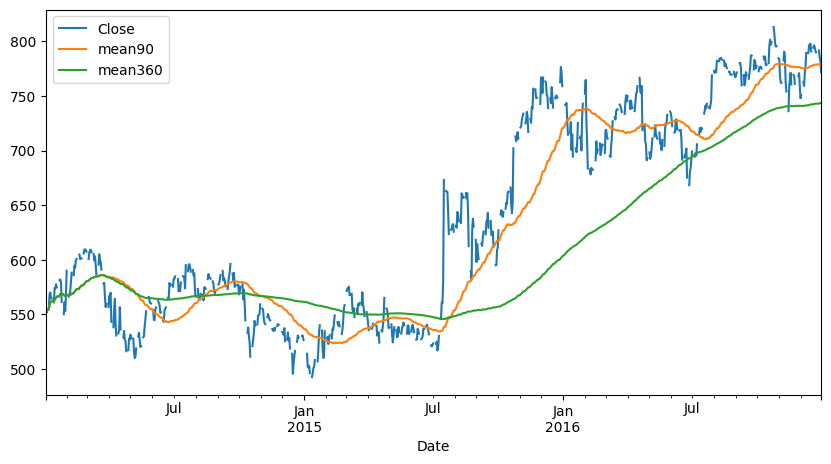

In [10]:
data['mean90']=r90
r360 = data['Close'].rolling(window='360D').mean()
data['mean360']= r360
data.plot()

**Multiple rolling Metrics**

you can also calculate multiple metrics at the same time, using the agg method. With a 90-day moving average and standard deviation you can easily discern periods of heightened volatility. 

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

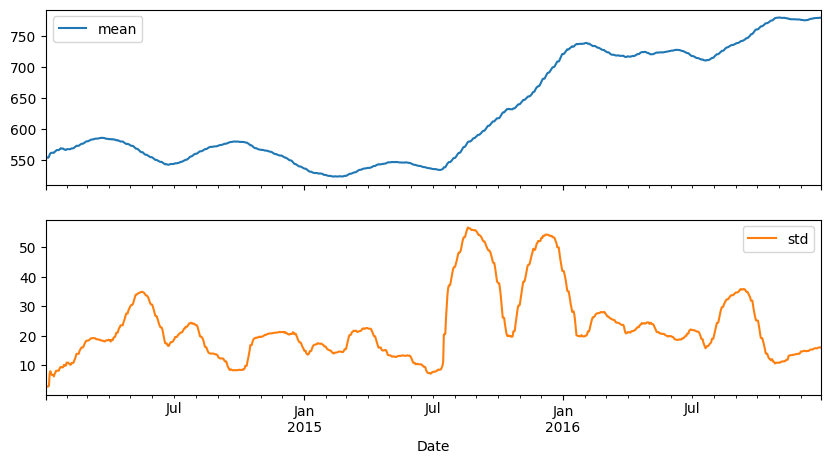

In [11]:
r = data.Close.rolling('90D').agg(['mean','std'])
r.plot(subplots=True)

let's display a 360 calendar day rolling median, or 50 percent quantile, alongside the 10 and 90 percent quantiles. Again you can see how the ranges for the stock price have evolved over time, with some periods more volatile than others.

<Axes: xlabel='Date'>

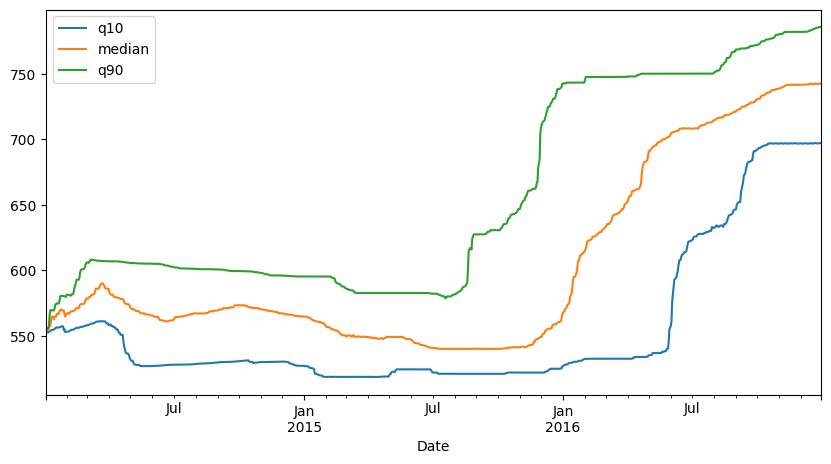

In [12]:
rolling = data.Close.rolling('360D')
q10 = rolling.quantile(0.1).to_frame('q10')
median = rolling.median().to_frame('median')
q90 = rolling.quantile(0.9).to_frame('q90')
pd.concat([q10, median, q90], axis=1).plot()

## Rolling average air quality since 2010 for new york city

The last video was about rolling window functions. To practice this new tool, you'll start with air quality trends for New York City since 2010. In particular, you'll be using the daily Ozone concentration levels provided by the Environmental Protection Agency to calculate & plot the 90 and 360 day rolling average.

We have already imported pandas as pd and matplotlib.pyplot as plt.

* Use `pd.read_csv()` to import `'ozone.csv'`, creating a `DateTimeIndex` from the `'date'` column using `parse_dates` and `index_col`, and assign the result to `data`.
* Add the columns `'90D'` and `'360D'` containing the 90 and 360 rolling calendar day `.mean()` for the column `'Ozone'`.
* Plot `data` starting 2010, setting `'New York City'` as title

In [13]:
# import and inspect ozone data here
data = pd.read_csv('../air_quality_data/ozone_nyc.csv', parse_dates=['date'], index_col='date')
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB
None
               Ozone
date                
2000-01-01  0.004032
2000-01-02  0.009486
2000-01-03  0.005580
2000-01-04  0.008717
2000-01-05  0.013754


In [14]:
# Calculate 90d and 360d rolling mean for the last price
data['90D'] = data['Ozone'].rolling('90D').mean()
data['360D'] = data['Ozone'].rolling('360D').mean()
data.head()

,Ozone,90D,360D
date,,,
2000-01-01,0.004032,0.004032,0.004032
2000-01-02,0.009486,0.006759,0.006759
2000-01-03,0.005580,0.006366,0.006366
2000-01-04,0.008717,0.006954,0.006954
2000-01-05,0.013754,0.008314,0.008314


<Axes: title={'center': 'New York City'}, xlabel='date'>

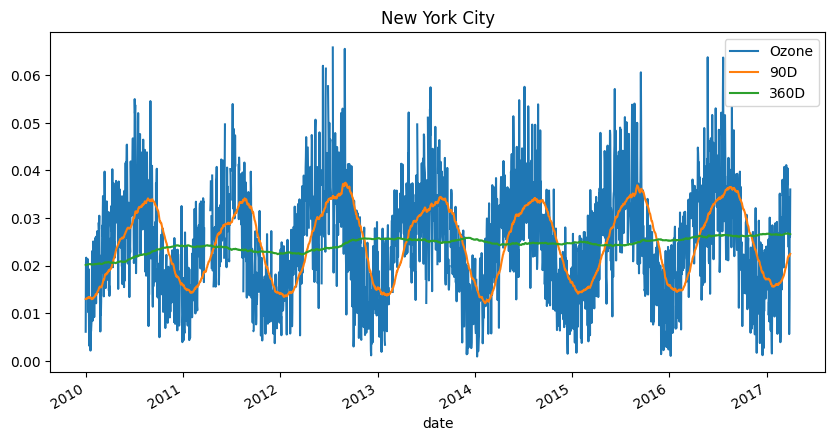

In [15]:
# Plot data
data.loc['2010':].plot(title='New York City')

## Rolling 360-day median & std. deviation for nyc ozone data since 2000

The last video also showed you how to calculate several rolling statistics using the `.agg()` method, similar to .`groupby()`.

Let's take a closer look at the air quality history of NYC using the Ozone data you have seen before. The daily data are very volatile, so using a longer term rolling average can help reveal a longer term trend.

You'll be using a 360 day rolling window, and `.agg()` to calculate the rolling mean and standard deviation for the daily average ozone values since 2000.

We have already imported pandas as pd, and matplotlib.pyplot as plt.

* Use `pd.read_csv()` to import `'ozone.csv'`, creating a `DateTimeIndex` from the `'date'` column using `parse_dates` and `index_col`, assign the result to `data`, and drop missing values using .`dropna()`.
* Select the `'Ozone'` column and create a `.rolling()` window using 360 periods, apply `.agg()` to calculate the `mean` and `std`, and assign this to `rolling_stats`.
* Use `.join()` to concatenate `data` with `rolling_stats`, and assign to `stats`.
* Plot `stats` using `subplots`.

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

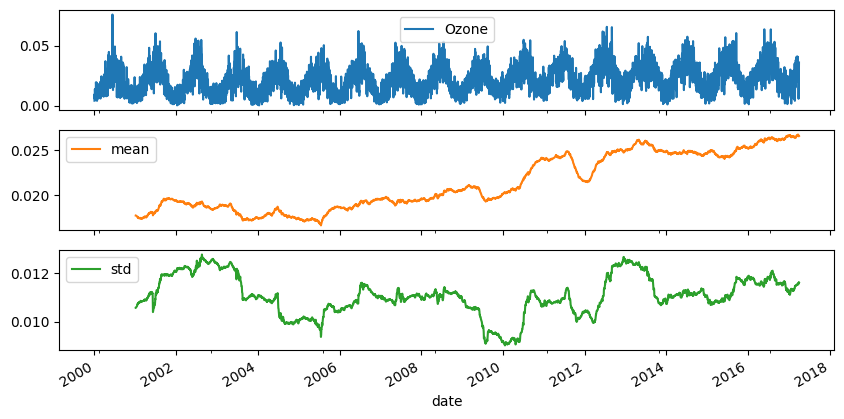

In [16]:
# Import and inspect ozone data here
data = pd.read_csv('../air_quality_data/ozone_nyc.csv', parse_dates=['date'], index_col='date').dropna()

# Calculate the rolling mean and std here
rolling_stats = data.Ozone.rolling(360).agg(['mean','std'])

# Join rolling_stats with ozone data
stats = data.join(rolling_stats)

# Plot stats
stats.plot(subplots=True)
#plt.show()


## Rolling quantiles for daily air quality in nyc

You learned in the last video how to calculate rolling quantiles to describe changes in the dispersion of a time series over time in a way that is less sensitive to outliers than using the mean and standard deviation.

Let's calculate rolling quantiles - at 10%, 50% (median) and 90% - of the distribution of daily average ozone concentration in NYC using a 360-day rolling window.

**Instructions**

We have also loaded the ozone data from 2000-2017 into the variable `data`.

* Apply `.resample()` with daily frequency `'D'` to `data` and apply `.interpolate()` to fill missing values, and reassign to `data`.
* Inspect the result using `.info()`.
* Create a `.rolling()` window using 360 periods, select the column `'Ozone'`, and assign the result to `rolling`.
* Insert three new columns, `'q10'`, `'q50'` and `'q90'` into `data`, calculating the respective quantiles from `rolling`.
* Plot `data`.

In [17]:
data# as seen here, data is in days.

,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754
...,...
2017-03-27,0.005640
2017-03-28,0.013870
2017-03-29,0.034341


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6300 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB
None


<Axes: xlabel='date'>

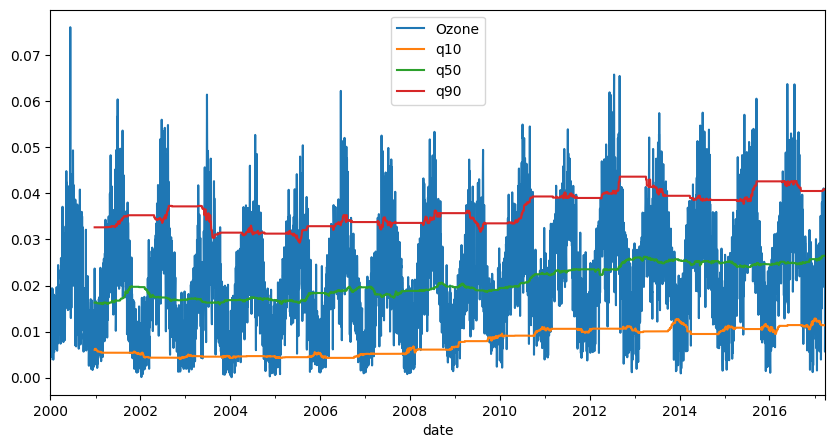

In [18]:
# Resample, interpolate and inspect ozone data here
data = data.resample('D').interpolate()
print(data.info())

# Create the rolling window
rolling = data.Ozone.rolling(360)

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(0.1).to_frame('q10')
data['q50'] = rolling.quantile(0.5).to_frame('q50')
data['q90'] = rolling.quantile(0.9).to_frame('q90')

# Plot the data
data.plot()

# Expanding window functions with pandas

**The basic idea**

In [19]:
df = pd.DataFrame({'data': range(5)})
df['expanding sum'] = df.data.expanding().sum()
df['cumulative sum'] = df.data.cumsum()
df

,data,expanding sum,cumulative sum
0,0,0.0,0
1,1,1.0,1
2,2,3.0,3
3,3,6.0,6
4,4,10.0,10


In [20]:
data = pd.read_csv('../stock_data/sp500.csv', parse_dates=['date'], index_col = 'date')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2395 non-null   float64
dtypes: float64(1)
memory usage: 37.4 KB


<Axes: xlabel='date'>

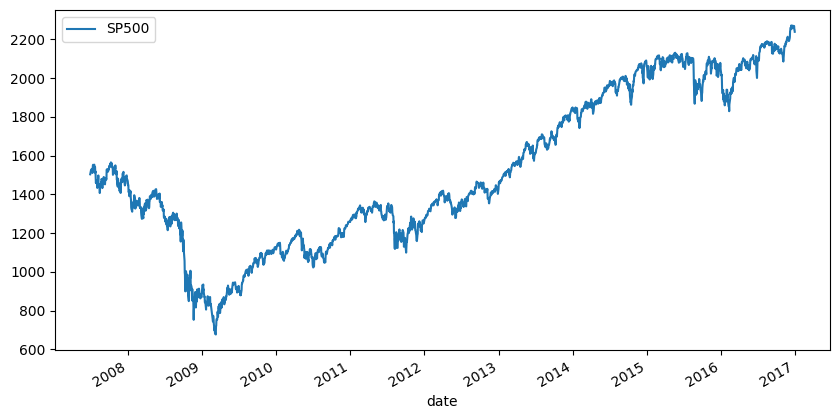

In [21]:
data.plot()

**How to calculate a running return**

* Single period return $r_t$: current price over last price minus 1:

$$r_t = \frac {P_t}{P_{t-1}} -1$$

* Multi-period return: product of $(1+ r_t)$ for all periods, minus 1:

$$R_T = (1+r_1)(1 + r_2)...(1 + r_T) -1$$

* For the period return $r_t$: `.pct_change()`.
* For basic math `.add()`, `.sub()`, `.mul()`, `.div()`
* For cumulative product: `.cumprod()`

**Running rate of return in practice**

In [22]:
data.SP500.head()

date
2007-06-29    1503.35
2007-07-02    1519.43
2007-07-03    1524.87
2007-07-05    1525.40
2007-07-06    1530.44
Name: SP500, dtype: float64

pct_change = (current - previous) / previous

In [23]:
pr = data.SP500.pct_change()# period return
pr.head()

date
2007-06-29         NaN
2007-07-02    0.010696
2007-07-03    0.003580
2007-07-05    0.000348
2007-07-06    0.003304
Name: SP500, dtype: float64

In [24]:
pr_plus_one = pr.add(1)
pr_plus_one.head()

date
2007-06-29         NaN
2007-07-02    1.010696
2007-07-03    1.003580
2007-07-05    1.000348
2007-07-06    1.003304
Name: SP500, dtype: float64

In [25]:
pr_plus_one.cumprod().head()#pr+_t * (pr+_t-1)

date
2007-06-29         NaN
2007-07-02    1.010696
2007-07-03    1.014315
2007-07-05    1.014667
2007-07-06    1.018020
Name: SP500, dtype: float64

<Axes: xlabel='date'>

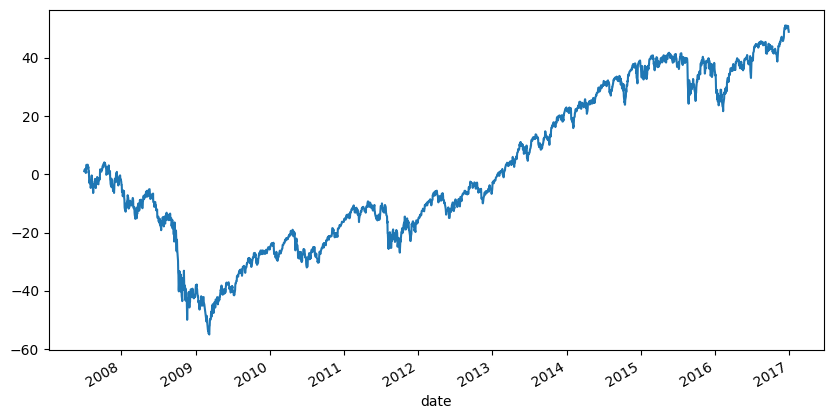

In [26]:
cumulative_return = pr_plus_one.cumprod().sub(1)
cumulative_return.mul(100).plot()

<Axes: xlabel='date'>

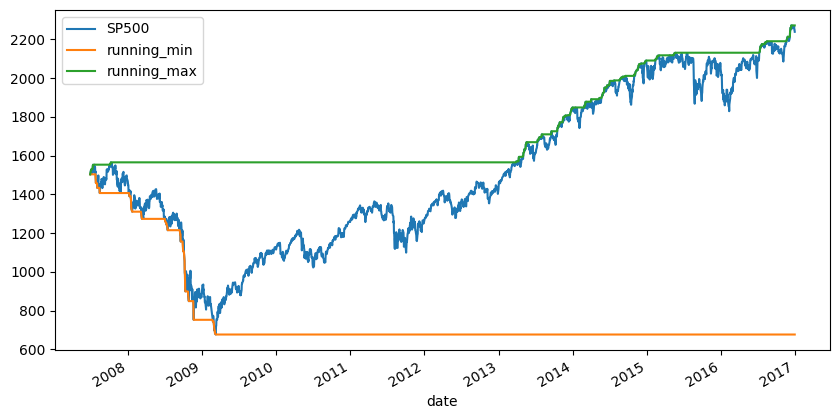

In [27]:
data['running_min'] = data.SP500.expanding().min()
data['running_max'] = data.SP500.expanding().max()
data.plot()

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

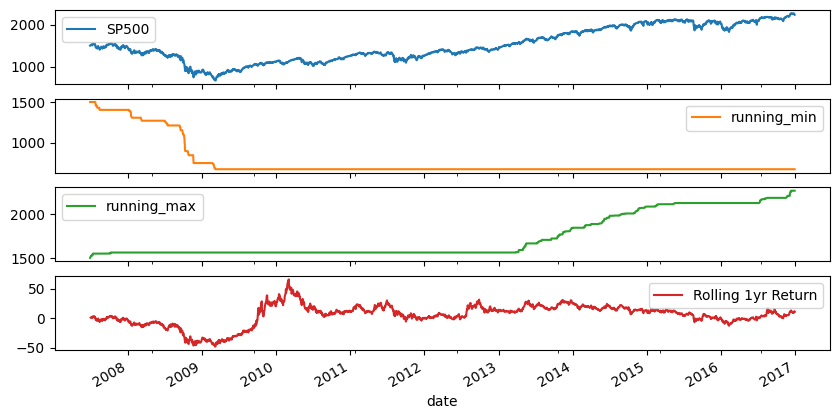

In [28]:
#Rolling annual rate of return
def multi_period_return(period_returns):
    return np.prod(period_returns + 1)-1

pr = data.SP500.pct_change() # period return
r= pr.rolling('360D').apply(multi_period_return)
data['Rolling 1yr Return'] = r.mul(100)
data.plot(subplots=True)

## Cumulative sum vs .diff()

In the video, you have learned about expanding windows that allow you to run cumulative calculations.

The cumulative sum method has in fact the opposite effect of the `.diff()` method that you came across in chapter 1.

To illustrate this, let's use the Google stock price time series, create the differences between prices, and reconstruct the series using the cumulative sum.

We have already imported pandas as pd and matplotlib.pyplot as plt. We have also loaded google stock prices into the variable data

* Apply `.diff()` to data, drop missing values, and assign the result to differences.
* Use `.first('D')` to select the first price from `data`, and assign it to `start_price`.
* Use `.append()` to combine `start_price` and `differences`, apply `.cumsum()` and assign this to `cumulative_sum`.
* Use `.equals()` to compare `data` and `cumulative_sum`, and print the result

In [29]:
data = pd.read_csv('../stock_data/google.csv', parse_dates=['Date'], index_col='Date').dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


In [30]:
data.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04


In [31]:
# Calculate differences
differences = data.diff().dropna()
differences

,Close
Date,
2014-01-03,-4.05
2014-01-06,6.15
2014-01-07,10.76
2014-01-08,1.18
2014-01-09,-5.49
...,...
2016-12-23,-1.35
2016-12-27,1.64
2016-12-28,-6.50


In [32]:
# Select start price
start_price = data.first('D')
start_price

,Close
Date,
2014-01-02,556.0


In [33]:
pd.concat([start_price,differences]).cumsum()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04
...,...
2016-12-23,789.91
2016-12-27,791.55
2016-12-28,785.05


In [34]:
# Calculate cumulative sum
cumulative_sum = pd.concat([start_price,differences]).cumsum()

# Validate cumulative sum equals data
print(data.equals(cumulative_sum))

True


## Cumulative return on $1,000 invested in google vs apple I

To put your new ability to do cumulative return calculations to practical use, let's compare how much $1,000 would be worth if invested in Google ('GOOG') or Apple ('AAPL') in 2010

In [35]:
data = pd.read_csv('../stock_data/apple_google.csv', parse_dates=['Date'], index_col='Date')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1864 entries, 2010-01-04 to 2017-05-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1624 non-null   float64
 1   GOOG    1864 non-null   float64
dtypes: float64(2)
memory usage: 43.7 KB


In [36]:
# Define your investment
investment = 1000

# Calculate the daily returns here
returns = data.pct_change()
returns.head()

,AAPL,GOOG
Date,,
2010-01-04,NaN,NaN
2010-01-05,NaN,-0.004408
2010-01-06,NaN,-0.025186
2010-01-07,NaN,-0.023303
2010-01-08,NaN,0.013345


In [37]:
# Calculate the cumulative returns here
returns_plus_one = returns + 1
returns_plus_one.head()

,AAPL,GOOG
Date,,
2010-01-04,NaN,NaN
2010-01-05,NaN,0.995592
2010-01-06,NaN,0.974814
2010-01-07,NaN,0.976697
2010-01-08,NaN,1.013345


In [38]:
cumulative_return = returns_plus_one.cumprod()
cumulative_return

,AAPL,GOOG
Date,,
2010-01-04,NaN,NaN
2010-01-05,NaN,0.995592
2010-01-06,NaN,0.970517
2010-01-07,NaN,0.947901
2010-01-08,NaN,0.960551
...,...,...
2017-05-24,3.341469,3.050406
2017-05-25,3.353018,3.096978
2017-05-26,3.347352,3.103143


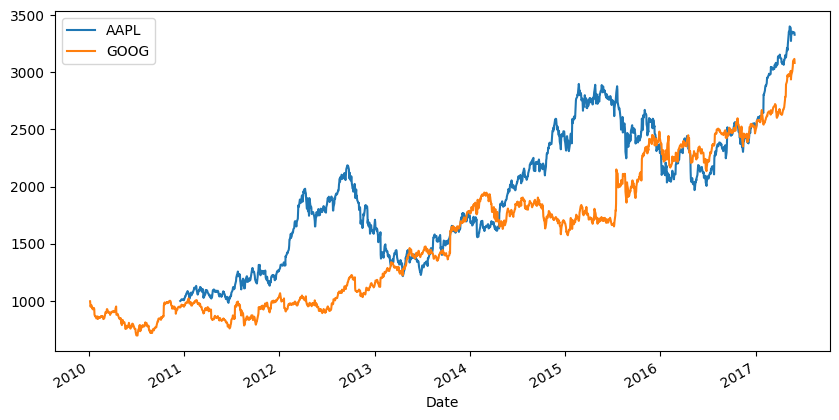

In [39]:
# Calculate and plot the investment return here
cumulative_return.mul(investment).plot();

## Cumulative return on $1,000 invested in google vs apple II

Apple outperformed Google over the entire period, but this may have been different over various 1-year sub periods, so that switching between the two stocks might have yielded an even better result.

To analyze this, calculate that cumulative return for rolling 1-year periods, and then plot the returns to see when each stock was superior.

In [40]:
# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1
# Calculate daily returns
daily_returns = data.pct_change()
daily_returns

,AAPL,GOOG
Date,,
2010-01-04,NaN,NaN
2010-01-05,NaN,-0.004408
2010-01-06,NaN,-0.025186
2010-01-07,NaN,-0.023303
2010-01-08,NaN,0.013345
...,...,...
2017-05-24,-0.002991,0.006471
2017-05-25,0.003456,0.015268
2017-05-26,-0.001690,0.001991


In [43]:
daily_returns.rolling('360D')

Rolling [window=360D,min_periods=1,center=False,axis=0,method=single]

In [44]:

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)
rolling_annual_returns

,AAPL,GOOG
Date,,
2010-01-04,NaN,NaN
2010-01-05,NaN,-0.004408
2010-01-06,NaN,-0.029483
2010-01-07,NaN,-0.052099
2010-01-08,NaN,-0.039449
...,...,...
2017-05-24,0.528052,0.303415
2017-05-25,0.533333,0.323315
2017-05-26,0.538254,0.320434


<Axes: xlabel='Date'>

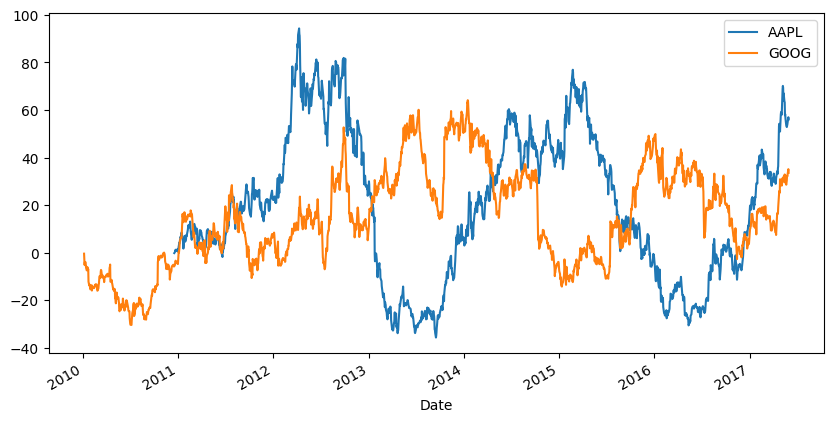

In [45]:
# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot()

## Case study: S&P500 price simulation



## Randomwalks&simulations
*  Daily stock returns are hard to predict 
*  Models often assume they are random in nature 
*  Numpy allows you to generate random numbers From random returns to prices: use `.cumprod()`
*  Two examples : 
   *  Generate random returns 
   *  Randomly selected actual SP500 returns.


In [47]:
# Generate random numbers

from numpy.random import normal, seed
from scipy.stats import norm
seed(42)
random_returns = normal(loc=0,scale=0.01, size=1000)
random_returns[0:15]

array([ 0.00496714, -0.00138264,  0.00647689,  0.0152303 , -0.00234153,
       -0.00234137,  0.01579213,  0.00767435, -0.00469474,  0.0054256 ,
       -0.00463418, -0.0046573 ,  0.00241962, -0.0191328 , -0.01724918])

/Users/diego.uchendu/Documents/2_Personal_Projects/6_ML_github/Machine_learning/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


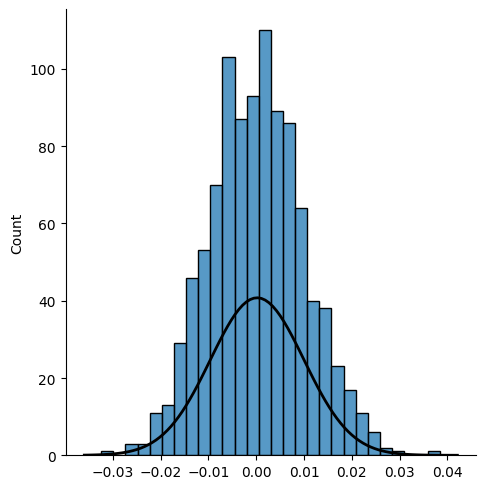

In [50]:
#sns.displot(random_returns,kde=False)

#mu, std = norm.fit(random_returns)
#xmin, xmax = plt.xlim()
#x = np.linspace(xmin, xmax, 100)
#p = norm.pdf(x, mu, std)
#plt.plot(x, p, 'k', linewidth=2)

/var/folders/51/f_rs2zy50vlbgbn3qf8zkphh0000gq/T/ipykernel_2207/162677717.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random_returns, fit=norm, kde=False)


<Axes: >

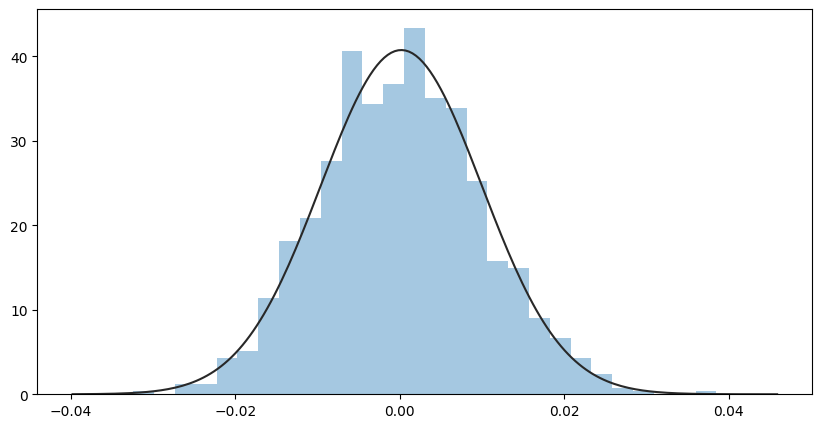

In [78]:
seed(42)
random_returns = normal(loc=0, scale=0.01, size=1000)
sns.distplot(random_returns, fit=norm, kde=False)

<Axes: >

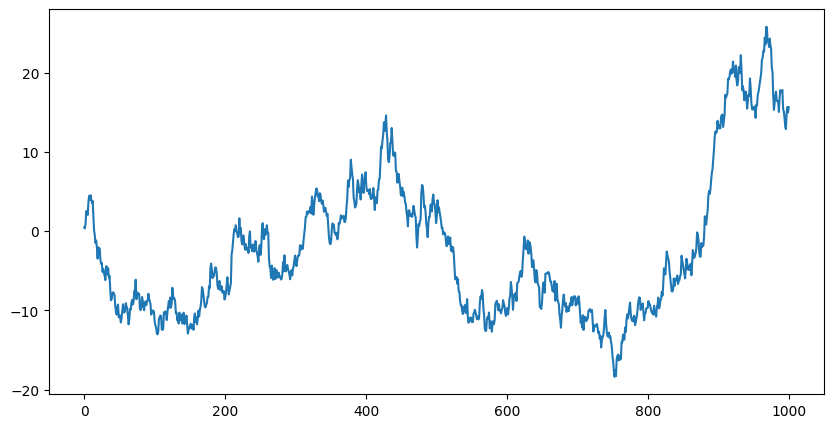

In [79]:
# Create a random price path

return_series = pd.Series(random_returns)
random_prices = return_series.add(1).cumprod().sub(1)
random_prices.mul(100).plot()

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

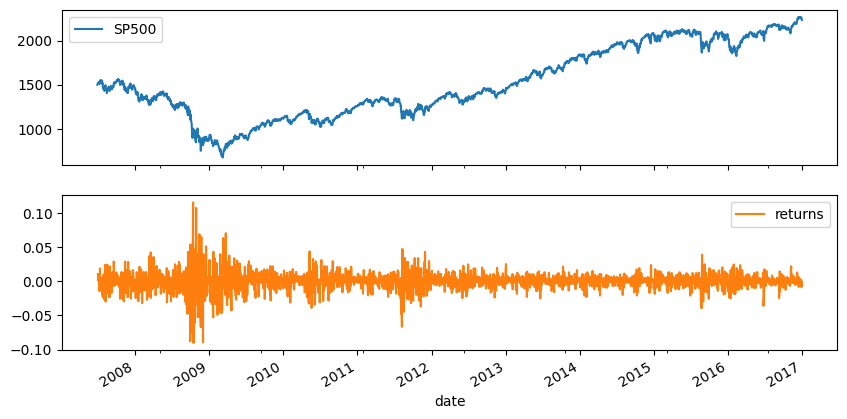

In [80]:
# S&P 500 prices & returns

data = pd.read_csv('../stock_data/sp500.csv', parse_dates=['date'], index_col='date')
data['returns'] = data.SP500.pct_change()
data.plot(subplots=True)


/var/folders/51/f_rs2zy50vlbgbn3qf8zkphh0000gq/T/ipykernel_2207/1238047447.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.returns.dropna().mul(100), fit=norm)


<Axes: xlabel='returns', ylabel='Density'>

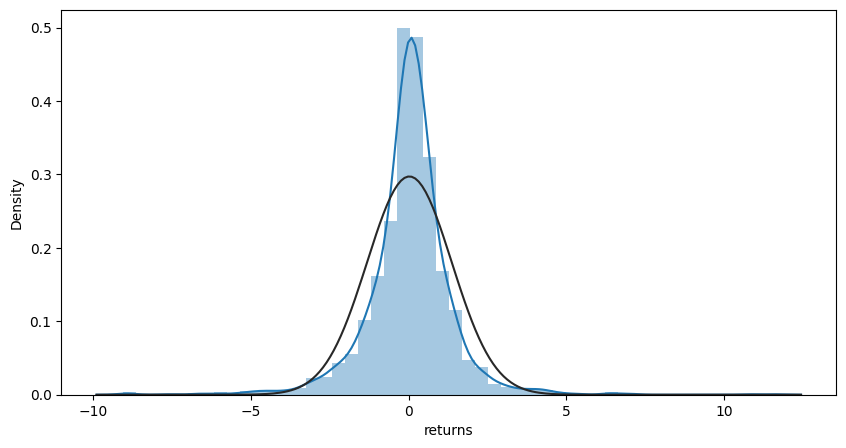

In [81]:
sns.distplot(data.returns.dropna().mul(100), fit=norm)

The blue line is S&P 500 Returns, while the black line is Normal Distribution.

In [82]:
#GeneraterandomS&P500returns

from numpy.random import choice
sample = data.returns.dropna()
n_obs = data.returns.count()
random_walk = choice(sample, size=n_obs)
random_walk = pd.Series(random_walk, index=sample.index)
random_walk.head()

date
2007-07-02    0.005007
2007-07-03    0.040729
2007-07-05   -0.000322
2007-07-06   -0.008404
2007-07-09    0.002119
dtype: float64

In [83]:
#Random S&P 500 price
start = data.SP500.first('D')
start

date
2007-06-29    1503.35
Name: SP500, dtype: float64

In [84]:
#Random S&P 500 price (2)

sp500_random = pd.concat([start, random_walk+1])
sp500_random.head()

date
2007-06-29    1503.350000
2007-07-02       1.005007
2007-07-03       1.040729
2007-07-05       0.999678
2007-07-06       0.991596
dtype: float64

<Axes: xlabel='date'>

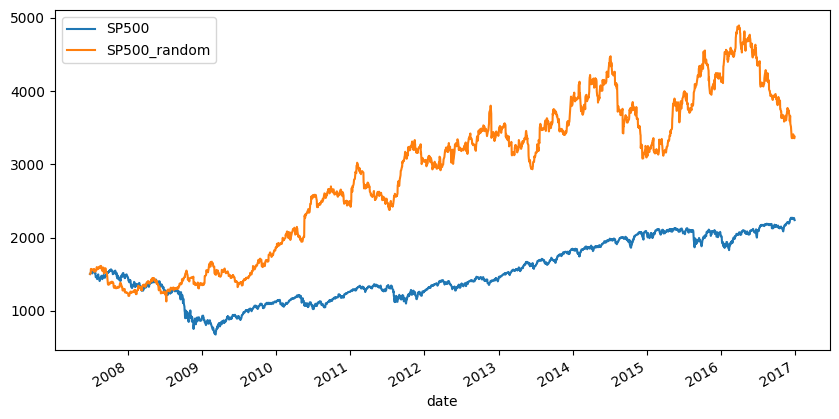

In [85]:
data['SP500_random'] = sp500_random.cumprod()
data[['SP500', 'SP500_random']].plot()


## Random walk I

In the last video, you have seen how to generate a random walk of returns, and how to convert this random return series into a random stock price path.

In this exercise, you'll build your own random walk by drawing random numbers from the normal distribution with the help of `numpy`.

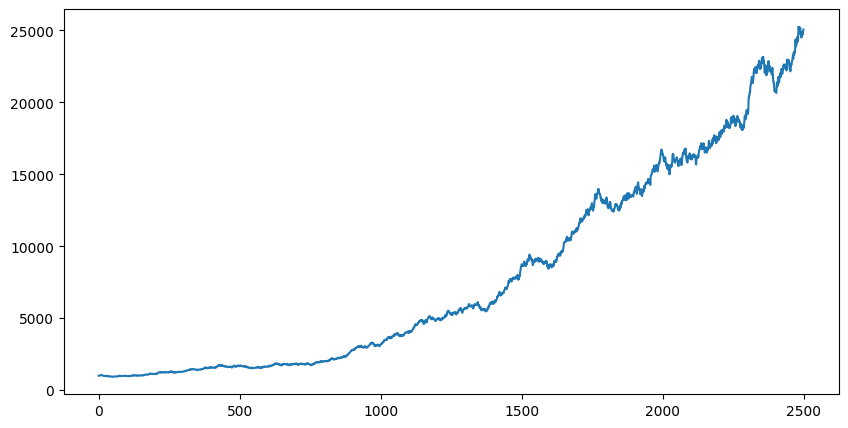

In [86]:
# Set seed here
seed(42)

# Create random_walk
random_walk = normal(size=2500,loc=.001,scale=0.01)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Create random_prices
random_prices = random_walk.add(1).cumprod()

# Plot random_prices here
random_prices.mul(1000).plot()
plt.show()

## Random walk II

In the last video, you have also seen how to create a random walk of returns by sampling from actual returns, and how to use this random sample to create a random stock price path.

In this exercise, you'll build a random walk using historical returns from Facebook's stock price since IPO through the end of May 31, 2017. Then you'll simulate an alternative random price path in the next exercise.

In [87]:
fb = pd.read_csv('../stock_data/fb.csv', header=None, index_col=0)
fb.index = pd.to_datetime(fb.index)
fb.index = fb.index.rename('date')
fb.columns = ['price']
fb

,price
date,
2012-05-17,38.00
2012-05-18,38.23
2012-05-21,34.03
2012-05-22,31.00
2012-05-23,32.00
...,...
2017-05-24,150.04
2017-05-25,151.96
2017-05-26,152.13


/var/folders/51/f_rs2zy50vlbgbn3qf8zkphh0000gq/T/ipykernel_2207/838678582.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random_walk);


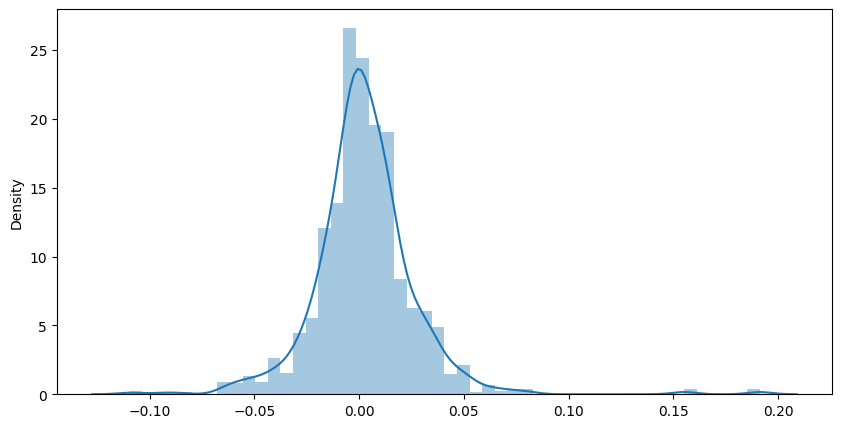

In [88]:
# Set seed here
np.random.seed(42)

# Calculate daily_returns here
daily_returns = fb['price'].pct_change().dropna()

# Get n_obs
n_obs = daily_returns.count()

# Create random_walk
random_walk = np.random.choice(daily_returns, size=n_obs)

# Convert random_walk to pd.Series
random_walk = pd.Series(random_walk)

# Plot random_walk distribution
sns.distplot(random_walk);

## Random walk III

In this exercise, you'll complete your random walk simulation using Facebook stock returns over the last five years. You'll start off with a random sample of returns like the one you've generated during the last exercise and use it to create a random stock price path.

In [89]:
random_walk = pd.read_csv('random_walk.csv', header=None, index_col=0)
date_range = pd.date_range(start=fb.index[1], periods= len(fb) - 1, freq='B')
random_walk.index = date_range
random_walk = pd.Series(random_walk[1])

In [90]:
random_walk.head()

2012-05-18   -0.004310
2012-05-21    0.025453
2012-05-22   -0.003027
2012-05-23    0.015062
2012-05-24   -0.037429
Freq: B, Name: 1, dtype: float64

/Users/diego.uchendu/Documents/2_Personal_Projects/6_ML_github/Machine_learning/venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/Users/diego.uchendu/Documents/2_Personal_Projects/6_ML_github/Machine_learning/venv/lib/python3.9/site-packages/matplotlib/ticker.py:2094: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


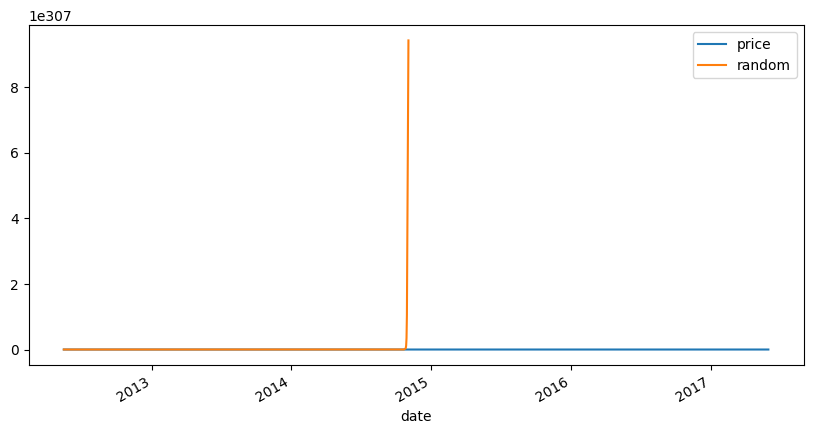

In [93]:
# Select fb start price here
start = fb['price'].first('D')

# Add 1 to random walk and append to start
random_walk = random_walk.add(1)
random_price = pd.concat([start,random_walk])

# Calculate cumulative product here
random_price = random_price.cumprod()

# Insert into fb and plot
fb['random'] = random_price
fb.plot();

## Relationships between time series: correlation


### Annual return correlations among several stocks

You have seen in the video how to calculate correlations, and visualize the result.

In this exercise, we have provided you with the historical stock prices for Apple (`AAPL`), Amazon (`AMZN`), IBM (`IBM`), WalMart (`WMT`), and Exxon Mobile (`XOM`) for the last 4,000 trading days from July 2001 until the end of May 2017.

You'll calculate the year-end returns, the pairwise correlations among all stocks, and visualize the result as an annotated heatmap.

**Instructions**

We have already imported `pandas` as `pd`, `seaborn` as `sns`, and `matplotlib.pyplot` as `plt`. We have loaded the daily close price for the five stocks in a variable called `data`.

* Inspect using `.info()`.
* Apply `.resample()` with year-end frequency (alias: `'A'`) to data and select the `.last()` price from each subperiod; assign this to `annual_prices`.
* Calculate `annual_returns` by applying .`pct_change()` to `annual_prices`.
* Calculate `correlations` by applying .`corr()` to `annual_returns` and print the result.
* Visualize `correlations` as an annotated `sns.heatmap()`.

In [94]:
data = pd.read_csv('../stock_data/5_stocks.csv', parse_dates=['Date'], index_col='Date')
data.head()

,AAPL,AMZN,IBM,WMT,XOM
Date,,,,,
2001-07-05,1.66,15.27,NaN,NaN,NaN
2001-07-06,1.57,15.27,106.50,47.34,43.40
2001-07-09,1.62,15.81,104.72,48.25,43.36
2001-07-10,1.51,15.61,101.96,47.50,42.88
2001-07-11,1.61,15.34,103.85,48.85,42.48


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4001 entries, 2001-07-05 to 2017-05-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    4000 non-null   float64
 1   AMZN    4000 non-null   float64
 2   IBM     4000 non-null   float64
 3   WMT     4000 non-null   float64
 4   XOM     4000 non-null   float64
dtypes: float64(5)
memory usage: 187.5 KB
None
          AAPL      AMZN       IBM       WMT       XOM
AAPL  1.000000  0.208731  0.460568 -0.183553  0.336413
AMZN  0.208731  1.000000  0.346407 -0.367620 -0.133965
IBM   0.460568  0.346407  1.000000  0.155445  0.367253
WMT  -0.183553 -0.367620  0.155445  1.000000  0.178833
XOM   0.336413 -0.133965  0.367253  0.178833  1.000000


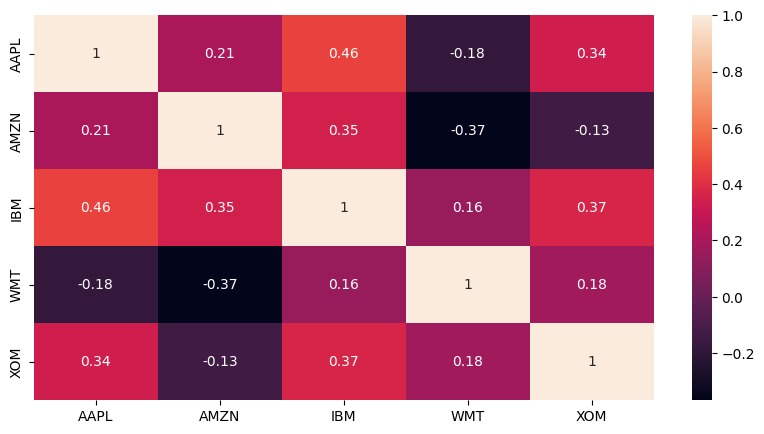

In [95]:
# Inspect data here
print(data.info())

# Calculate year-end prices here
annual_prices = data.resample('A').last()

# Calculate annual returns here
annual_returns = annual_prices.pct_change()

# Calculate and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)

# Visualize the correlations as heatmap here
sns.heatmap(correlations, annot=True);